# Telco Churn Analysis

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
# Load and read the dataset
telco_base_data = pd.read_csv("dataset/customer_churn.csv")
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_base_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Check the various attributes of the dataset

In [4]:
# Dimension of the dataset
telco_base_data.shape

(7043, 21)

In [5]:
# Description of the dataset
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Lets get the associated data types of the entire dataframe
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Lets get the associated data types of the Churn attribute
telco_base_data.Churn.dtypes

dtype('O')

In [8]:
# Lets get the associated data types of the MonthlyCharges attribute
telco_base_data.MonthlyCharges.dtypes

dtype('float64')

In [9]:
# Available columns or features in the dataset
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
# Display all the attributes in a list form
telco_base_data.columns.values.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
# Descriptive Statistics of Numeric Attributes
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Statistics of Churners
+ There are 5174 non-churners and
+ There are 1869 active churners

The data is highly imbalanced  having a ratio of non-churners to churners as 73:27

In [12]:
telco_base_data.groupby("Churn").size()

Churn
No     5174
Yes    1869
dtype: int64

In [13]:
telco_base_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.02, 'Count of Target Variable Per Category')

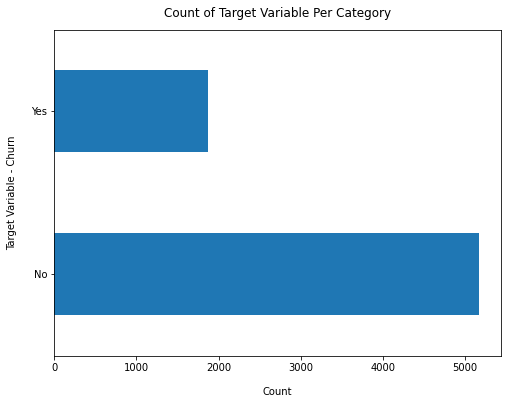

In [14]:
telco_base_data["Churn"].value_counts().plot(kind="barh", figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable - Churn", labelpad=14)
plt.title("Count of Target Variable Per Category", y=1.02)

In [15]:
# Percentage of the distribution
100 * telco_base_data['Churn'].value_counts() / len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### From the percentage distribution of the Churn attribute
+ The data is highly imbalanced
+ So we analyze the data with other features while taking the target values separately to get some insights

In our analysis, our main focus here is the 1869 customers tagged as possible churners. We also want to know the characterisitcs of these customers.

In [16]:
# Lets know if we have any missing values
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

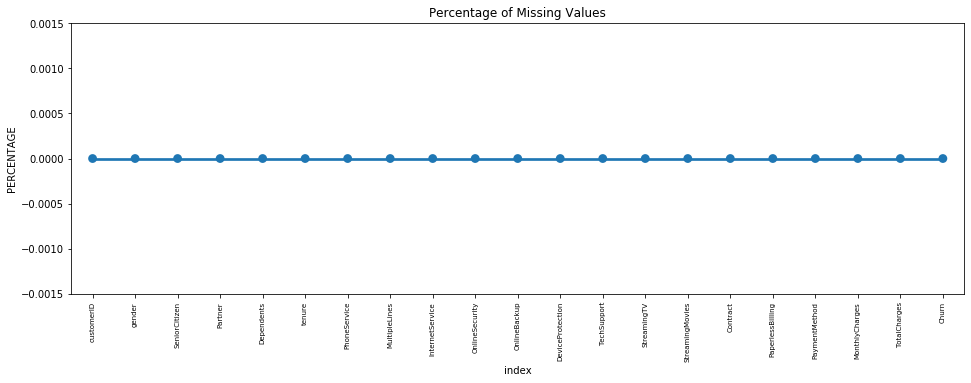

In [17]:
# Visualizing the percentage of missing values on a graph

missing = pd.DataFrame((telco_base_data.isnull().sum() * 100) / telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index', 0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel('PERCENTAGE')
plt.title('Percentage of Missing Values')
plt.show()

## Missing Data - Initial Intuition
+ Here, we don't have missing value

## Data Cleaning

#### 1. Create a copy of the base data for manipulation & processing

In [18]:
telco_data = telco_base_data.copy()

In [19]:
telco_data.TotalCharges.dtypes

dtype('O')

#### 2. TotalCharges attribute is an object. We need to convert it into numeric

In [20]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')

In [21]:
# Lets have a glance at the new data type
telco_data.TotalCharges.dtypes

dtype('float64')

In [22]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### 3. As we can see from the above query result, TotalCharges has 11 null values. Lets check these records

In [23]:
telco_data['TotalCharges'].isnull() == True

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [24]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### 4. Missing Values Treatment

Since the % of these records compared to the total dataset is low ie 0.15%. It will be a good idea to ignore them from further processing

In [25]:
# Number of records before dropping missing values
telco_data.shape[0]

7043

In [26]:
# Lets remove the missing values
telco_data.dropna(how='any', inplace=True)

In [27]:
# Number of records after dropping the missing values
telco_data.shape[0]

7032

#### 5. Divide the customers into bins based on Tenure e.g for Tenure < 12 months, assign a Tenure group of 1-12. For Tenure between 1-2yrs assign a Tenure group of 13-24; and so on.

In [28]:
# Lets get the maximum tenure
telco_data['tenure'].max()

72

In [29]:
["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [30]:
# Group the tenure attribute in the groups of 10
labels = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12), right=False, labels=labels)

In [31]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

#### 6. Remove the columns that are not required for processing

In [32]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

In [33]:
telco_data.columns.values.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [34]:
# Drop two columns - customerID and tenure from our DataFrame
telco_data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [35]:
telco_data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype=object)

# Data Exploration
Plot the distribution of individual predictors by churn (Response variable)

### Univariate Analysis
Analysis of one variable

In [36]:
count_attr = 0
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])):
    count_attr += 1
    print("{} - {}" .format(i, predictor))
print("\n")
print("Total predictors = {}" .format(count_attr))

0 - gender
1 - SeniorCitizen
2 - Partner
3 - Dependents
4 - PhoneService
5 - MultipleLines
6 - InternetService
7 - OnlineSecurity
8 - OnlineBackup
9 - DeviceProtection
10 - TechSupport
11 - StreamingTV
12 - StreamingMovies
13 - Contract
14 - PaperlessBilling
15 - PaymentMethod
16 - tenure_group


Total predictors = 17


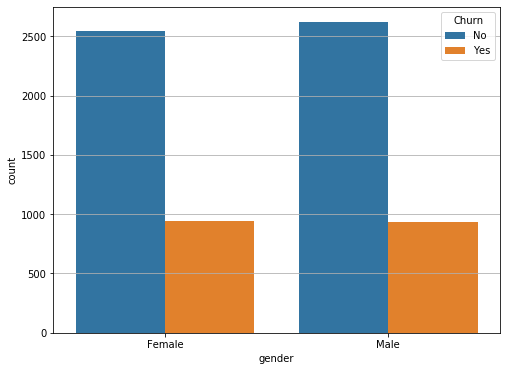

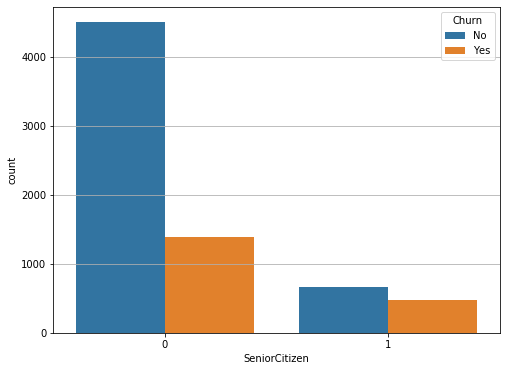

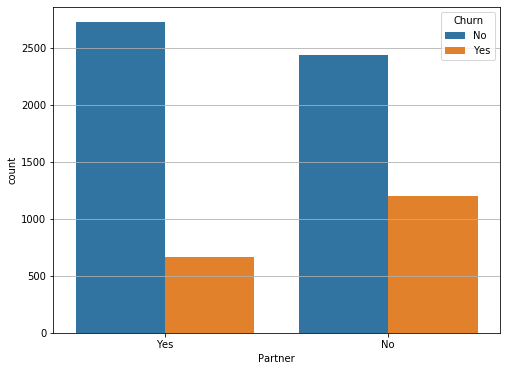

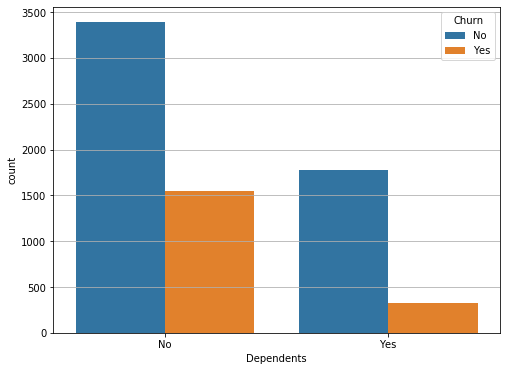

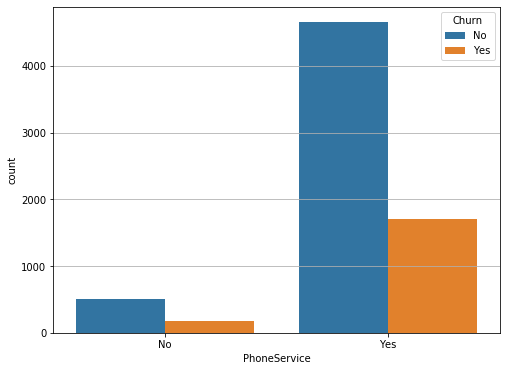

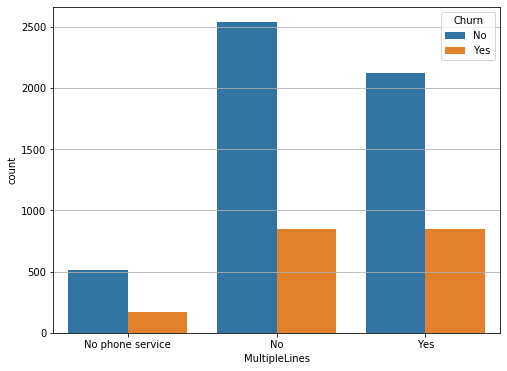

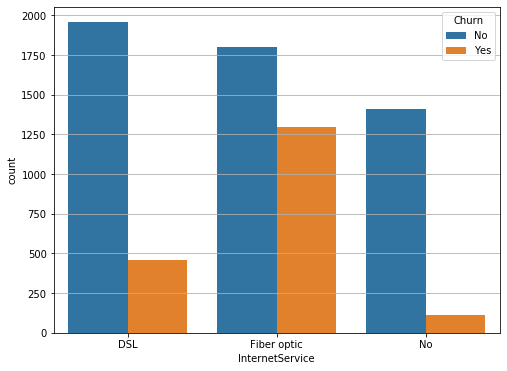

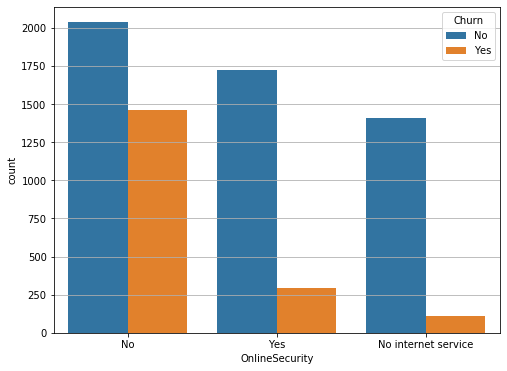

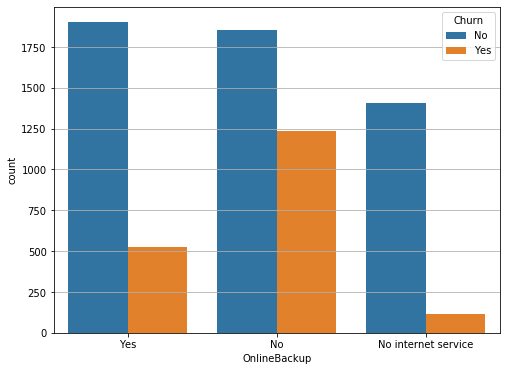

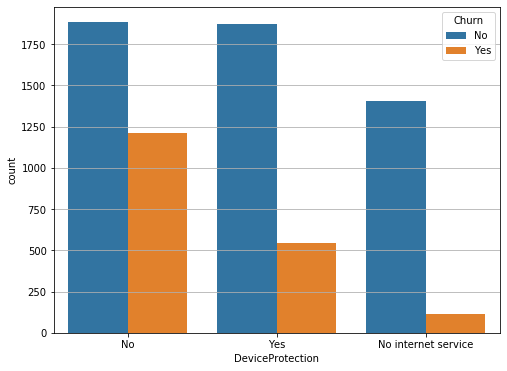

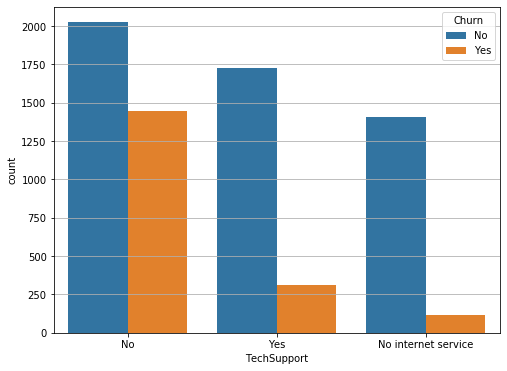

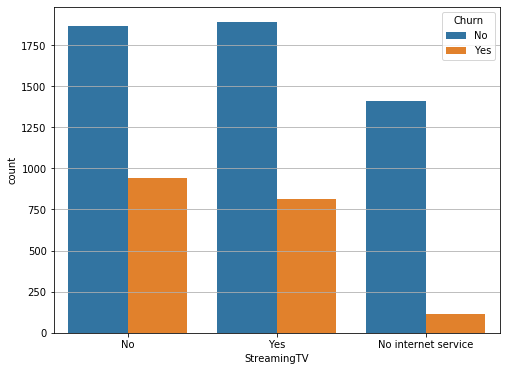

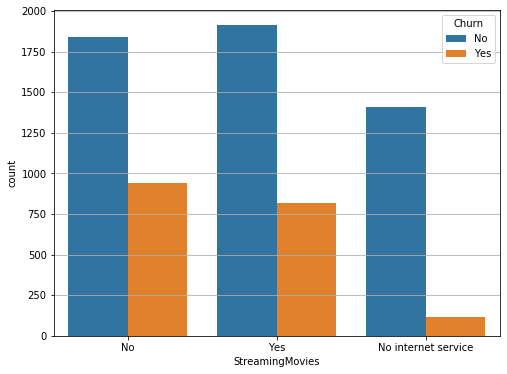

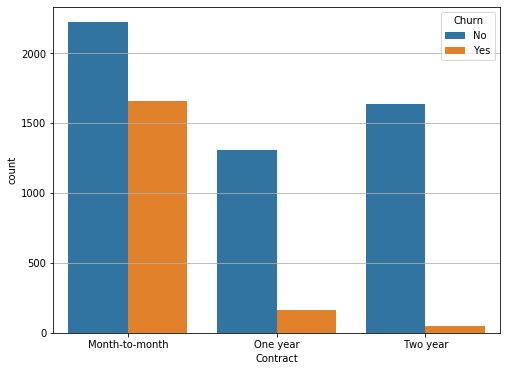

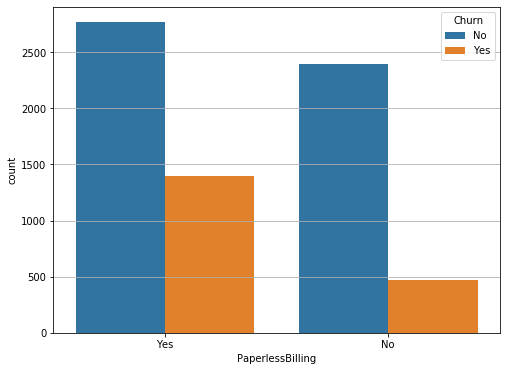

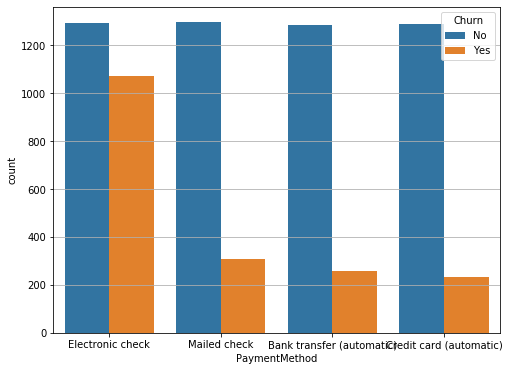

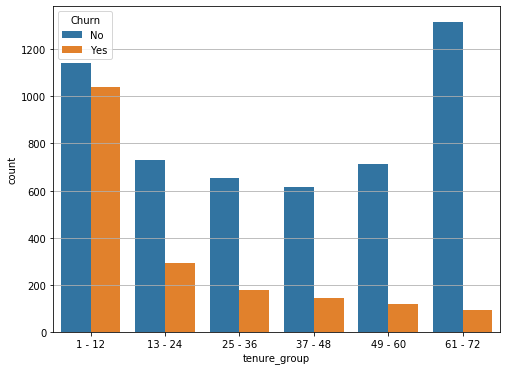

In [40]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])):
    plt.figure(i, figsize=(8,6))
    plt.grid(axis='both')
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

#### 2. Convert the target variable "Churn" into numeric form 0 and 1 ie Yes=1 and No=0

In [41]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes', 1, 0)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


#### 3. Convert all the categorical variables into dummy variables

In [45]:
pd.get_dummies(telco_data, drop_last=True)

TypeError: get_dummies() got an unexpected keyword argument 'drop_last'

In [43]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


#### Lets get the relationship between MonthlyCharges and TotalCharges

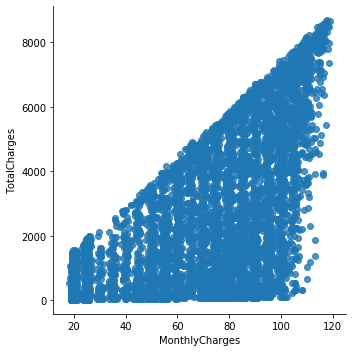

In [46]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

#### As we can see from the above plot, TotalCharges increase as MonthlyCharges increase

#### 9. Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Churn by Monthly CHarges')

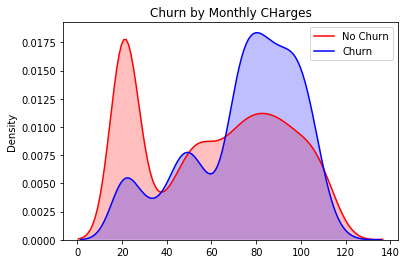

In [54]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 0)], color='red', shade=True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 1)], ax=Mth, color='blue', shade=True)
Mth.legend(['No Churn', 'Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_title('Churn by Monthly CHarges')

##### Insight: Churn is high when monthly charges are high

Text(0.5, 1.0, 'Churn by Total Charges')

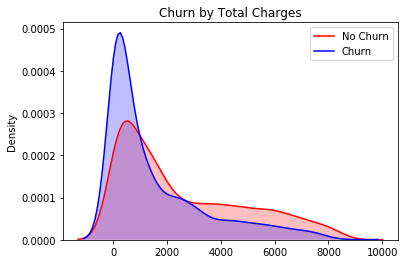

In [58]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 0)], color='red', shade=True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 1)], ax=Tot, color='blue', shade=True)
Tot.legend(['No Churn','Churn'])
Tot.set_ylabel('Density')
Tot.set_title('Churn by Total Charges')

##### Insight: The lower the Total Charges the higher the churn and the higher the Total Charges the lower the churn

#### However, if we combine the insights of 3 attributes ie tenure_group, MonthlyCharges and TotalCharges, the picture will be clearer

#### 10. Build a correlation of all predictors with respect to churn

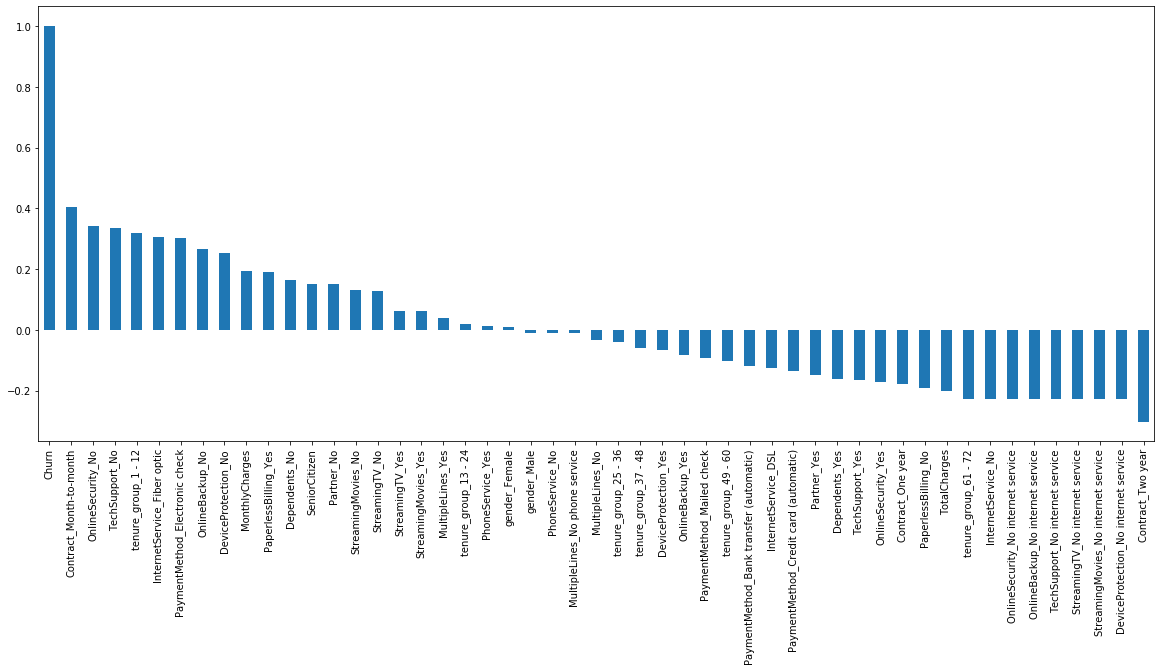

In [59]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

##### Derived Insights from the Correlation Graph

High churn is seen in the case of month-to-month contract, No OnlineSecurity, No TechSupport, 1-12 Tenure_Group, Fibre Optic 
InternetService, Electronic Check PaymentMethod, No OnlineBackUp, No DeviceProtection.

Low churn is seen in the case of long term contracts, subscription without internet service, and the customers engaged for 5yrs

Factors like gender, availability of phoneService and # of multiple lines have almost NO impact on churn.

This is also evident on the heatmap below

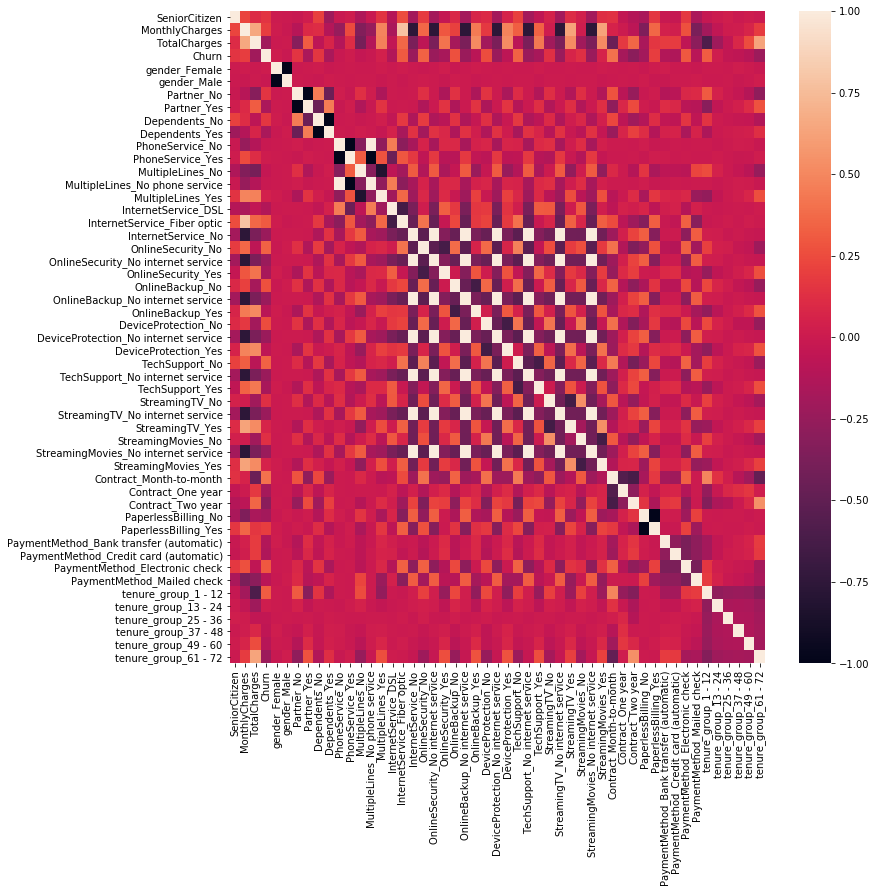

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr())

### Bivariate Analysis
This helps us to analyze the relationship or correlation between two variables

In [69]:
new_df1_target0 = telco_data.loc[telco_data['Churn'] == 0]
new_df1_target1 = telco_data.loc[telco_data['Churn'] ==1 ]

print("Dimension of Non-Churners: {} \nDimension of Churners: {}" .format(new_df1_target0.shape, new_df1_target1.shape))

Dimension of Non-Churners: (5163, 20) 
Dimension of Churners: (1869, 20)


In [76]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.show()

In [80]:
new_df1_target1.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

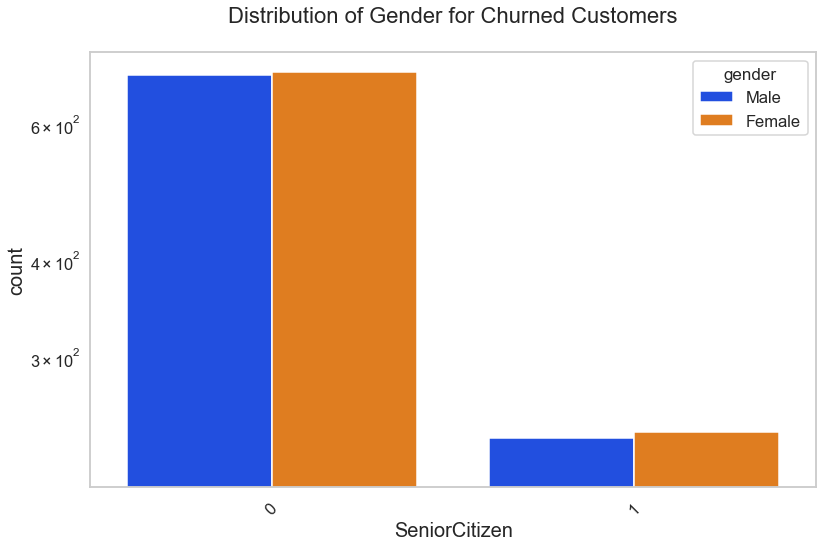

In [81]:
uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of Gender for Churned Customers', hue='gender')

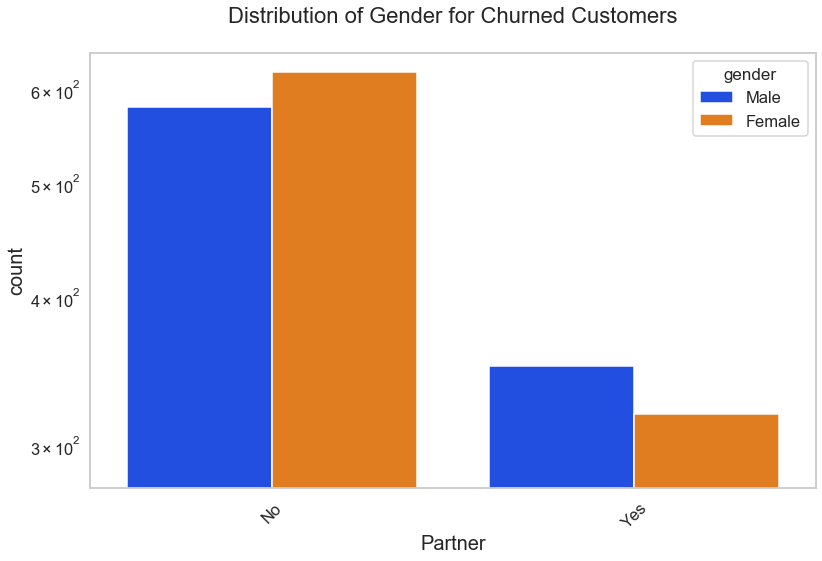

In [77]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

In [83]:
new_df1_target1.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

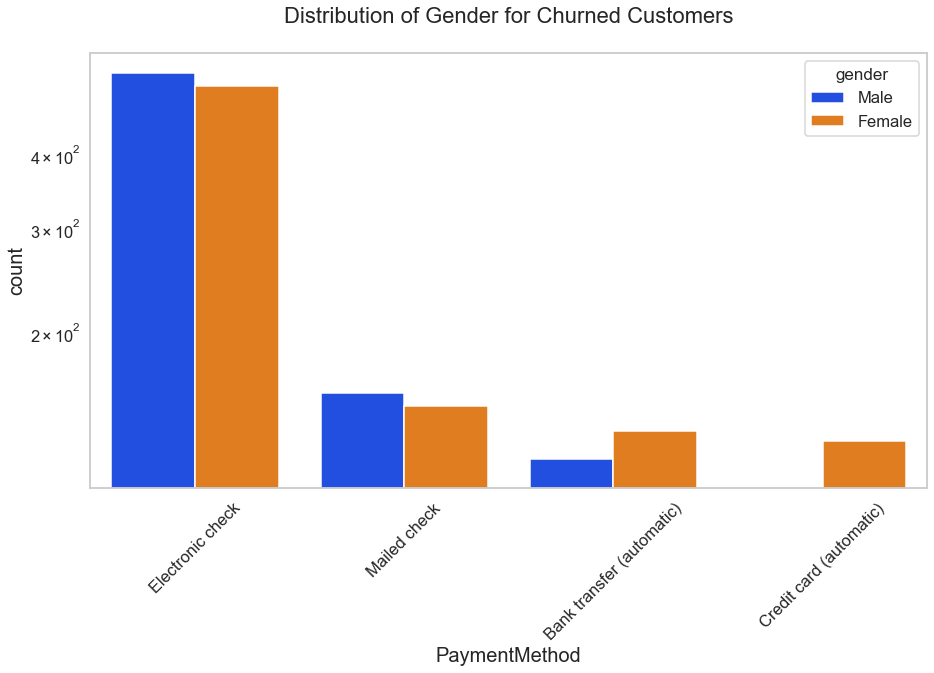

In [87]:
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of Gender for Churned Customers', hue='gender')

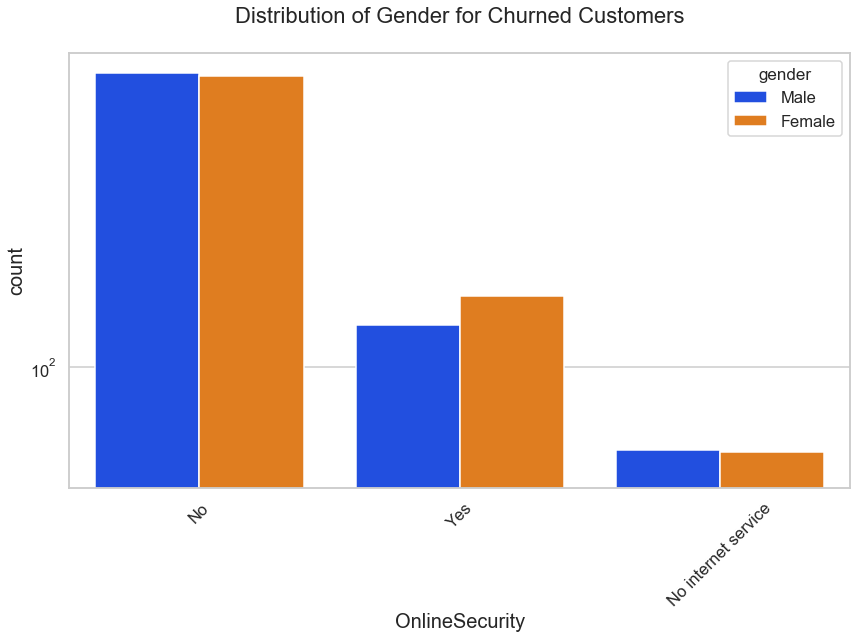

In [86]:
uniplot(new_df1_target1, col='OnlineSecurity', title='Distribution of Gender for Churned Customers', hue='gender')

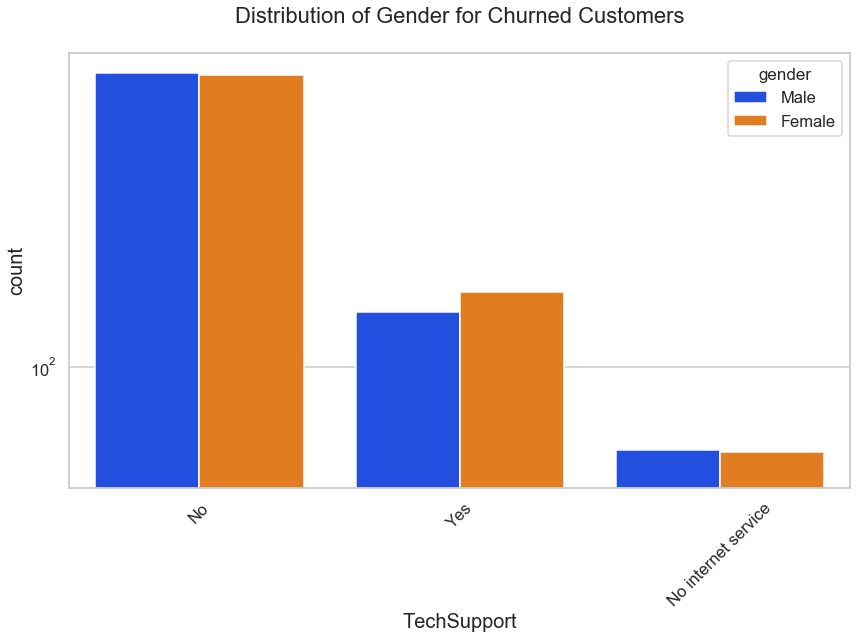

In [85]:
uniplot(new_df1_target1, col='TechSupport', title='Distribution of Gender for Churned Customers', hue='gender')

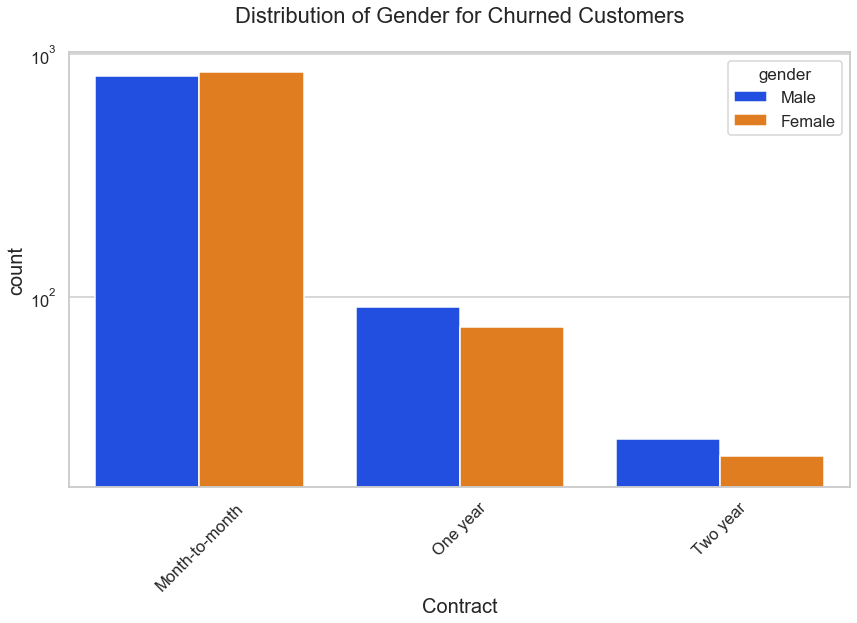

In [84]:
uniplot(new_df1_target1, col='Contract', title='Distribution of Gender for Churned Customers', hue='gender')

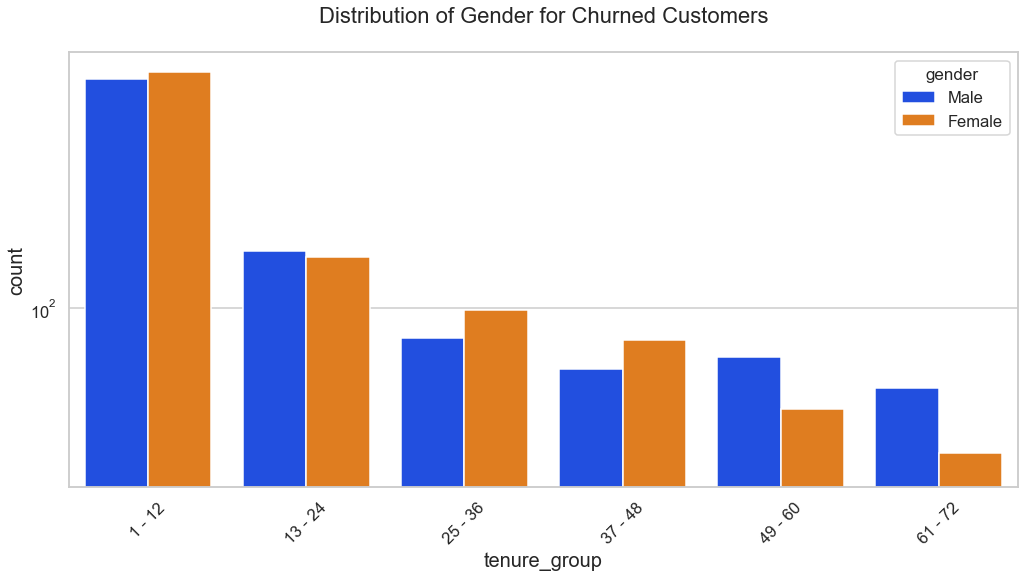

In [82]:
uniplot(new_df1_target1, col='tenure_group', title='Distribution of Gender for Churned Customers', hue='gender')

## Conclusion

These are some of the quick insight from this exercise
+ Electronic check medium are the highest churners
+ Customers with month-to-month contract type are more likely to churn
+ Customers with no Online security and no Tech Support are high churners
+ Non-Senior citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights

In [79]:
telco_data_dummies.to_csv('dataset/telco_churn.csv', index=False)